In [1]:
import pandas as pd

In [2]:
import numpy as np

In [4]:
dataset = pd.read_csv('data/winemag-data-130k-v2.csv')

In [5]:
dataset

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
Unnamed: 0               129971 non-null int64
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 13.9+ MB


In [11]:
dataset.groupby('title').size()

title
1+1=3 2008 Rosé Cabernet Sauvignon (Penedès)                                     1
1+1=3 NV Brut Sparkling (Cava)                                                   2
1+1=3 NV Cygnus Brut Nature Reserva Made With Organic Grapes Sparkling (Cava)    2
1+1=3 NV Rosé Sparkling (Cava)                                                   1
10 Knots 2006 Beachcomber White (Paso Robles)                                    1
                                                                                ..
àMaurice 2014 Fred Estate Syrah (Walla Walla Valley (WA))                        1
àMaurice NV Pour Me Red (Columbia Valley (WA))                                   1
Štoka 2009 Izbrani Teran (Kras)                                                  1
Štoka 2011 Grganja Vitovska (Kras)                                               1
Štoka 2011 Izbrani Teran (Kras)                                                  1
Length: 118840, dtype: int64

In [14]:
dataset['title'].hist()

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f35c0493a70> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f35c0498dd0> (for post_execute):


KeyboardInterrupt: 

In [16]:
%matplotlib inline

In [17]:
dataset['title'].hist()

/home/enrico/miniconda3/envs/bda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/enrico/miniconda3/envs/bda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f35c0493a70> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f35c0498dd0> (for post_execute):


KeyboardInterrupt: 

In [7]:
def my_tokenizer(text):
    return text.split() if text != None else []

In [ ]:
tokens = dataset['description'].map(my_tokenizer).sum()

In [5]:
dataset['description'][:5000]

0       Aromas include tropical fruit, broom, brimston...
1       This is ripe and fruity, a wine that is smooth...
2       Tart and snappy, the flavors of lime flesh and...
3       Pineapple rind, lemon pith and orange blossom ...
4       Much like the regular bottling from 2012, this...
                              ...                        
4995    Sweaty and pungent, loaded with overtones of c...
4996    Here's a well-toasted red wine from Southern I...
4997    Candied fruit and caramel ride on the back of ...
4998    This Cabernet Sauvignon-Syrah blend is soft an...
4999    Pungent, zesty and quite varietal in its expre...
Name: description, Length: 5000, dtype: object

In [8]:
tokens = dataset['description'][:250].map(my_tokenizer).sum()

In [10]:
tokens

['Aromas',
 'include',
 'tropical',
 'fruit,',
 'broom,',
 'brimstone',
 'and',
 'dried',
 'herb.',
 'The',
 'palate',
 "isn't",
 'overly',
 'expressive,',
 'offering',
 'unripened',
 'apple,',
 'citrus',
 'and',
 'dried',
 'sage',
 'alongside',
 'brisk',
 'acidity.',
 'This',
 'is',
 'ripe',
 'and',
 'fruity,',
 'a',
 'wine',
 'that',
 'is',
 'smooth',
 'while',
 'still',
 'structured.',
 'Firm',
 'tannins',
 'are',
 'filled',
 'out',
 'with',
 'juicy',
 'red',
 'berry',
 'fruits',
 'and',
 'freshened',
 'with',
 'acidity.',
 "It's",
 'already',
 'drinkable,',
 'although',
 'it',
 'will',
 'certainly',
 'be',
 'better',
 'from',
 '2016.',
 'Tart',
 'and',
 'snappy,',
 'the',
 'flavors',
 'of',
 'lime',
 'flesh',
 'and',
 'rind',
 'dominate.',
 'Some',
 'green',
 'pineapple',
 'pokes',
 'through,',
 'with',
 'crisp',
 'acidity',
 'underscoring',
 'the',
 'flavors.',
 'The',
 'wine',
 'was',
 'all',
 'stainless-steel',
 'fermented.',
 'Pineapple',
 'rind,',
 'lemon',
 'pith',
 'and',
 '

In [12]:
from collections import Counter

In [33]:
counter = Counter(tokens)
counter.most_common(20)

[('and', 697),
 ('of', 346),
 ('the', 345),
 ('a', 284),
 ('with', 219),
 ('is', 170),
 ('in', 132),
 ('this', 130),
 ('The', 112),
 ('to', 104),
 ('wine', 94),
 ('on', 86),
 ('aromas', 81),
 ('This', 79),
 ('palate', 73),
 ('flavors', 71),
 ('fruit', 62),
 ('but', 58),
 ('ripe', 53),
 ('finish.', 51)]

In [32]:
counter.most_common(50)

[('and', 697),
 ('of', 346),
 ('the', 345),
 ('a', 284),
 ('with', 219),
 ('is', 170),
 ('in', 132),
 ('this', 130),
 ('The', 112),
 ('to', 104),
 ('wine', 94),
 ('on', 86),
 ('aromas', 81),
 ('This', 79),
 ('palate', 73),
 ('flavors', 71),
 ('fruit', 62),
 ('but', 58),
 ('ripe', 53),
 ('finish.', 51),
 ('black', 50),
 ('that', 48),
 ('Drink', 48),
 ('are', 46),
 ('it', 46),
 ('from', 42),
 ('by', 42),
 ('acidity', 41),
 ('notes', 41),
 ('offers', 37),
 ('tannins', 36),
 ('has', 35),
 ('It', 34),
 ('red', 31),
 ('A', 31),
 ("It's", 30),
 ('fruit,', 29),
 ('its', 28),
 ('as', 27),
 ('for', 27),
 ('an', 25),
 ('cherry,', 25),
 ('oak', 25),
 ('nose', 25),
 ('flavors.', 24),
 ('plum', 24),
 ('cherry', 24),
 ('blend', 24),
 ('acidity.', 23),
 ('soft', 23)]

In [16]:
%pip install nltk

     |████████████████████████████████| 1.4MB 2.7MB/s eta 0:00:01
     |████████████████████████████████| 92kB 999kB/s eta 0:00:01
     |████████████████████████████████| 686kB 6.1MB/s eta 0:00:01
     |████████████████████████████████| 71kB 1.8MB/s eta 0:00:01
  Created wheel for nltk: filename=nltk-3.5-cp37-none-any.whl size=1434677 sha256=2782bb95324fd3ac976de1e46b89a5c8b8a2c707e2a42c9b9421eabefac42d2f
  Stored in directory: /home/enrico/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
Note: you may need to restart the kernel to use updated packages.


In [18]:
import nltk

In [21]:
len(tokens)

10072

In [22]:
from nltk.corpus import stopwords

In [27]:
stop_words = stopwords.words('english')

In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/enrico/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
filtered = [w for w in tokens if not w in stop_words]

In [30]:
filtered

['Aromas',
 'include',
 'tropical',
 'fruit,',
 'broom,',
 'brimstone',
 'dried',
 'herb.',
 'The',
 'palate',
 'overly',
 'expressive,',
 'offering',
 'unripened',
 'apple,',
 'citrus',
 'dried',
 'sage',
 'alongside',
 'brisk',
 'acidity.',
 'This',
 'ripe',
 'fruity,',
 'wine',
 'smooth',
 'still',
 'structured.',
 'Firm',
 'tannins',
 'filled',
 'juicy',
 'red',
 'berry',
 'fruits',
 'freshened',
 'acidity.',
 "It's",
 'already',
 'drinkable,',
 'although',
 'certainly',
 'better',
 '2016.',
 'Tart',
 'snappy,',
 'flavors',
 'lime',
 'flesh',
 'rind',
 'dominate.',
 'Some',
 'green',
 'pineapple',
 'pokes',
 'through,',
 'crisp',
 'acidity',
 'underscoring',
 'flavors.',
 'The',
 'wine',
 'stainless-steel',
 'fermented.',
 'Pineapple',
 'rind,',
 'lemon',
 'pith',
 'orange',
 'blossom',
 'start',
 'aromas.',
 'The',
 'palate',
 'bit',
 'opulent,',
 'notes',
 'honey-drizzled',
 'guava',
 'mango',
 'giving',
 'way',
 'slightly',
 'astringent,',
 'semidry',
 'finish.',
 'Much',
 'like

In [37]:
filtered_counter = Counter(filtered)
filtered_counter.most_common(50)

[('The', 112),
 ('wine', 94),
 ('aromas', 81),
 ('This', 79),
 ('palate', 73),
 ('flavors', 71),
 ('fruit', 62),
 ('ripe', 53),
 ('finish.', 51),
 ('black', 50),
 ('Drink', 48),
 ('acidity', 41),
 ('notes', 41),
 ('offers', 37),
 ('tannins', 36),
 ('It', 34),
 ('red', 31),
 ('A', 31),
 ("It's", 30),
 ('fruit,', 29),
 ('cherry,', 25),
 ('oak', 25),
 ('nose', 25),
 ('flavors.', 24),
 ('plum', 24),
 ('cherry', 24),
 ('blend', 24),
 ('acidity.', 23),
 ('soft', 23),
 ('bright', 23),
 ('shows', 23),
 ('touch', 22),
 ('Cabernet', 22),
 ('sweet', 22),
 ('now.', 21),
 ('vanilla', 21),
 ('palate,', 21),
 ('white', 20),
 ('well', 20),
 ('citrus', 19),
 ('berry', 19),
 ('wine,', 19),
 ('dark', 19),
 ('fresh', 19),
 ('dried', 18),
 ('alongside', 18),
 ('crisp', 18),
 ('tannins.', 18),
 ('spice', 18),
 ('rich', 18)]

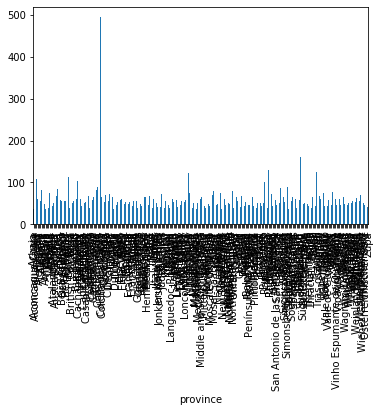

In [49]:
dataset[dataset['price'] > dataset['price'].mean()]['price'].groupby(dataset['province']).mean().plot(kind="bar")